# Direct Marketing Campaign of Portuguese Banking Institution - Master Notebook

## All 6 Models Training, Evaluation and Comparision

Here we are training, evaluating and comparing below 6 machine learning models:

1. **Logistic Regression Classifier**

2. **Decision Tree Classifier**

3. **K-Nearest Neighbors Classifier**

4. **Naive Bayes - Gaussian Classifier**

5. **Ensemble Model - Random Forest**

6. **Ensemble Model - XGBoost**

### Features:

- Automated training of all models

- Comprehensive evaluation metrics

- Visual comparisons

- Confusion matrices for each model

- Performance benchmarking

---

## Import Libraries

In [1]:
#IMPORT LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, classification_report
)
import pickle
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("Direct Marketing Campaign of Portuguese Banking Institution - ALL 6 MODELS")
print("="*80)
print(f"Started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n✓ All libraries imported successfully\n")

Direct Marketing Campaign of Portuguese Banking Institution - ALL 6 MODELS
Started at: 2026-01-24 20:21:43

✓ All libraries imported successfully



## Load Dataset

In [2]:
#Export Train, Test, Bank Details Dataset
bank_train =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-full.csv');
bank_test =pd.read_csv('https://raw.githubusercontent.com/vaibhavkhare1/ML_ASSIGNMENT_COMPARISION_REPO/main/bank-test.csv')

In [3]:
# Quick Look on Train dataset - Display first 5 rows of train dataset

bank_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Get Dataset Info for Train data

bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Shape of Train Dataset
bank_train.shape

(45211, 17)

In [6]:
#Missing Value from Train Dataset
bank_train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
# Quick Look on Test dataset - Display first 5 rows of train dataset
bank_test.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
#Get Dataset Info for Test data

bank_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
#Shape of Test Dataset
bank_test.shape

(4521, 17)

In [10]:
#Missing Value from Test Dataset
bank_test.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [11]:
#Describe bank_train dataset
bank_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
#Describe bank_test dataset
bank_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


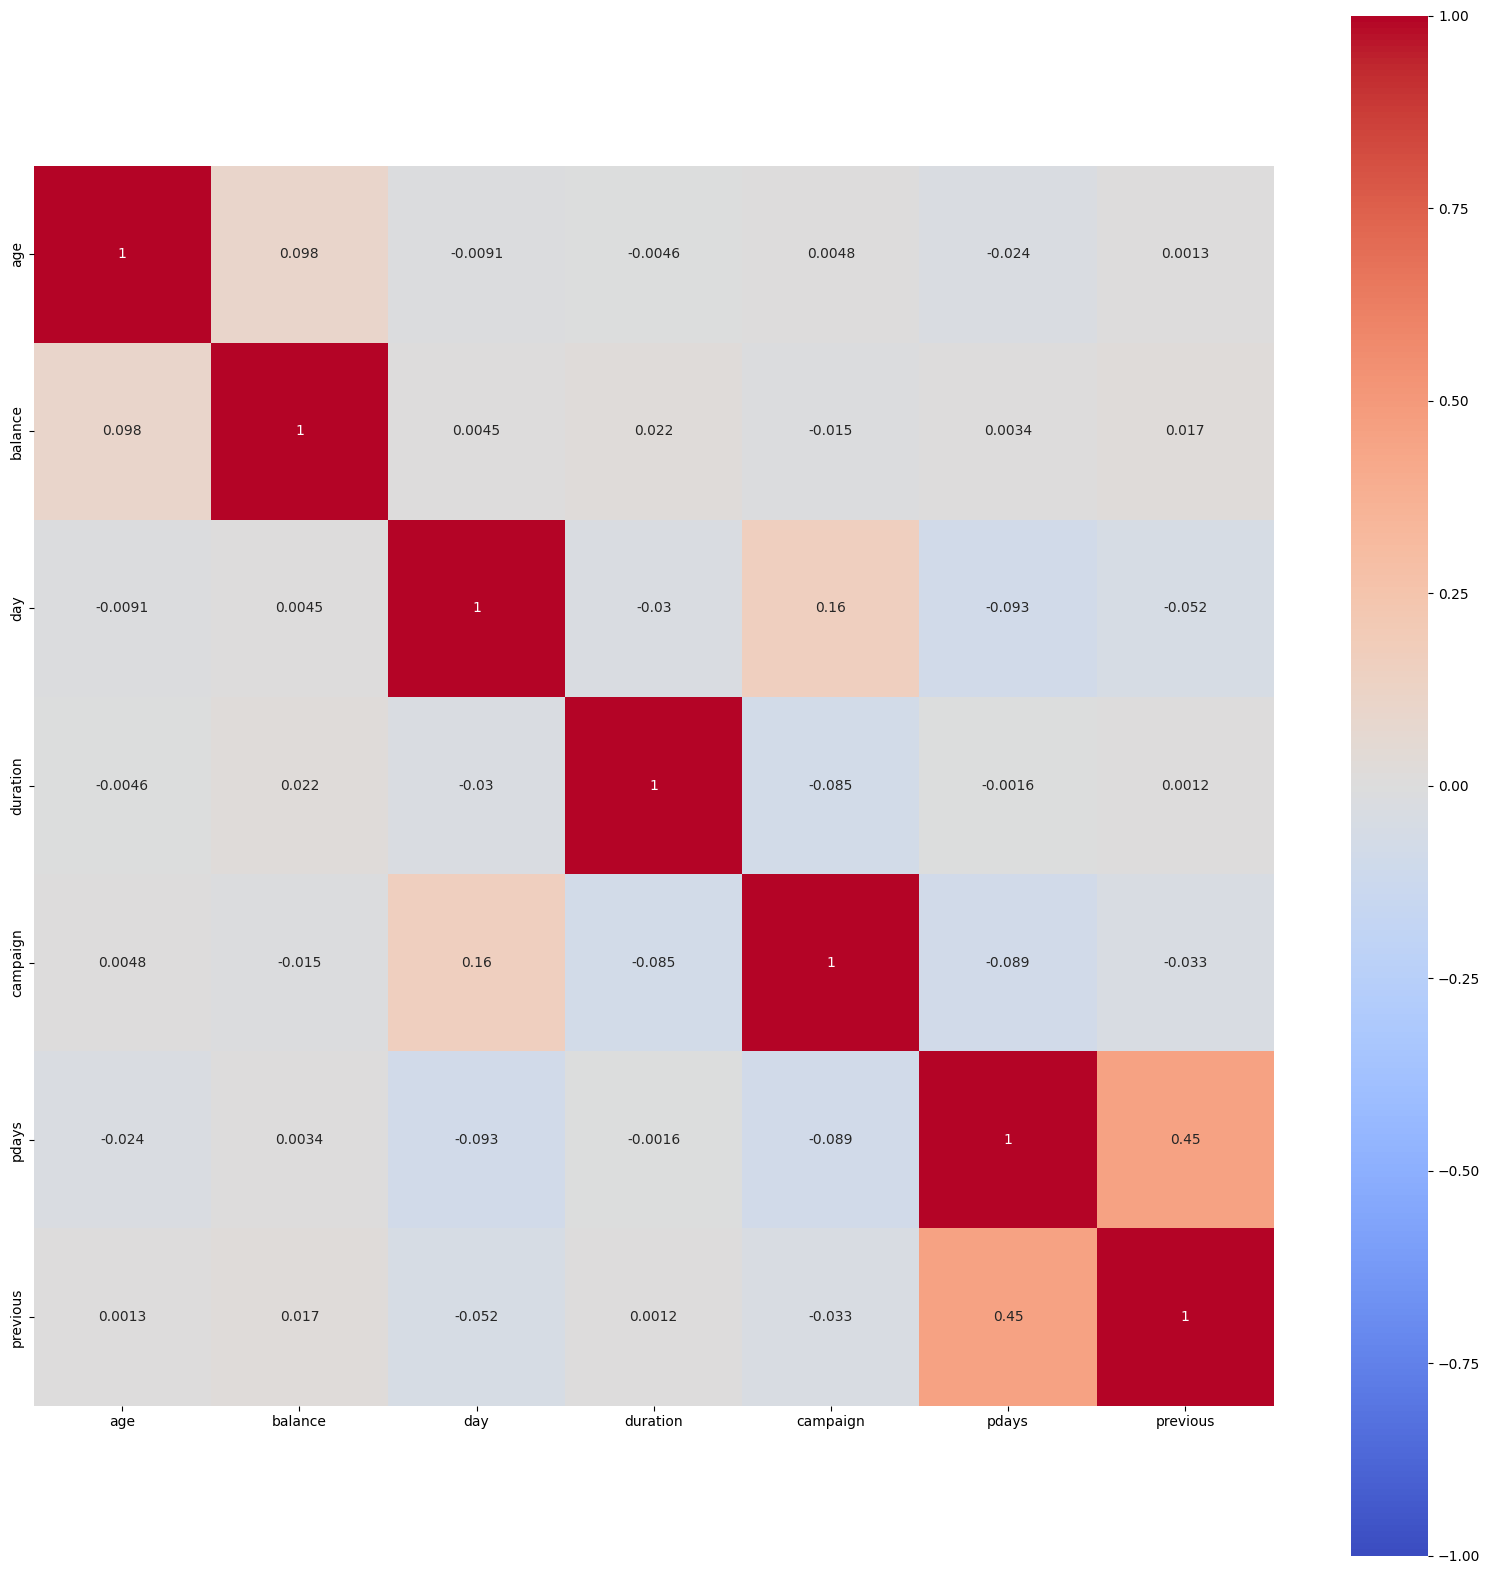

In [13]:
#Find Correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(bank_train.corr(numeric_only=True, method='pearson'),cmap='coolwarm',vmin=-1,vmax=1,annot=True,square=True)
plt.show()

In [14]:
#Handle Categorical features

categorical_cols = bank_train.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"Identified categorical columns (excluding 'y'): {categorical_cols}")

Identified categorical columns (excluding 'y'): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


## Data Preparation

In [15]:
#Handle Categorical features

categorical_cols = bank_train.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print(f"Identified categorical columns (excluding 'y'): {categorical_cols}")

Identified categorical columns (excluding 'y'): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [16]:
#Apply One Hot Encoding to convert these categorical variables into a numerical format suitable for machine learning models

bank_train_encoded = pd.get_dummies(bank_train, columns=categorical_cols, drop_first=False)
bank_test_encoded = pd.get_dummies(bank_test, columns=categorical_cols, drop_first=False)

# Align columns between bank_train_encoded and bank_test_encoded
# Get all columns from the training set (bank_train_encoded)
aligned_columns = bank_train_encoded.columns.tolist()

# Reindex the test set to match the training set columns, filling missing with 0
bank_test_encoded = bank_test_encoded.reindex(columns=aligned_columns, fill_value=0)

print("Shape of bank_train_encoded:", bank_train_encoded.shape)
print("Shape of bank_test_encoded:", bank_test_encoded.shape)
print("First 5 rows of bank_train_encoded:")
print(bank_train_encoded.head())
print("\nFirst 5 rows of bank_test_encoded:")
print(bank_test_encoded.head())

Shape of bank_train_encoded: (45211, 52)
Shape of bank_test_encoded: (4521, 52)
First 5 rows of bank_train_encoded:
   age  balance  day  duration  campaign  pdays  previous   y  job_admin.  \
0   58     2143    5       261         1     -1         0  no       False   
1   44       29    5       151         1     -1         0  no       False   
2   33        2    5        76         1     -1         0  no       False   
3   47     1506    5        92         1     -1         0  no       False   
4   33        1    5       198         1     -1         0  no       False   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0            False  ...      False      False       True      False   
1            False  ...      False      False       True      False   
2            False  ...      False      False       True      False   
3             True  ...      False      False       True      False   
4            False  ...      False      False       True      Fals

In [17]:
# Prepare Feature and Target Sets
X_train = bank_train_encoded.drop('y', axis=1)
y_train = bank_train_encoded['y']

X_test = bank_test_encoded.drop('y', axis=1)
y_test = bank_test_encoded['y']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (45211, 51)
Shape of y_train: (45211,)
Shape of X_test: (4521, 51)
Shape of y_test: (4521,)


In [18]:
#Apply Log Tranformation to target
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

print("Value counts of y_train after transformation:")
print(y_train.value_counts())
print(
"\nValue counts of y_test after transformation:")
print(y_test.value_counts())

Value counts of y_train after transformation:
y
0    39922
1     5289
Name: count, dtype: int64

Value counts of y_test after transformation:
y
0    4000
1     521
Name: count, dtype: int64


In [19]:
# FEATURE SCALING
# =============================================================================
print("\n" + "="*80)
print("FEATURE SCALING")
print("="*80)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Features scaled")
# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved\n")


FEATURE SCALING
✓ Features scaled
✓ Scaler saved



## Helper Function

In [20]:
#HELPER FUNCTION
# =============================================================================
def evaluate_model(model, X_test, y_test, model_name, use_scaled=False):
    """Evaluate model and return metrics"""
    X_test_eval = X_test_scaled if use_scaled else X_test
    # Predictions
    y_pred = model.predict(X_test_eval)
    y_pred_proba = model.predict_proba(X_test_eval) if hasattr(model, 'predict_proba') else None
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    if y_pred_proba is not None:
        # For binary classification, roc_auc_score expects y_true (1D) and y_score (probabilities of the positive class, 1D)
        auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    else:
        auc = 0.0
    cm = confusion_matrix(y_test, y_pred)
    return {
        'model_name': model_name,
        'accuracy': round(accuracy, 4),
        'auc': round(auc, 4),
        'precision': round(precision, 4),
        'recall': round(recall, 4),
        'f1': round(f1, 4),
        'mcc': round(mcc, 4),
        'confusion_matrix': cm
    }

## Train All Models

In [21]:
#TRAIN ALL MODELS
# =============================================================================
print("="*80)
print("TRAINING ALL 6 MODELS")
print("="*80)
all_results = []
training_times = []

# MODEL 1: LOGISTIC REGRESSION
print("\n[1/6] Logistic Regression...")
start = time.time()
log_reg_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
log_reg_model.fit(X_train_scaled, y_train)
log_reg_time = time.time() - start
log_reg_results = evaluate_model(log_reg_model, X_test, y_test, "Logistic Regression", use_scaled=True)
all_results.append(log_reg_results)
training_times.append(("Logistic Regression", log_reg_time))
with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(log_reg_model, f)
print(f" ✓ Accuracy: {log_reg_results['accuracy']:.4f} | Time: {log_reg_time:.2f}s")

# MODEL 2: DECISION TREE
print("\n[2/6] Decision Tree...")
start = time.time()
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_time = time.time() - start
dt_results = evaluate_model(dt_model, X_test, y_test, "Decision Tree", use_scaled=False)
all_results.append(dt_results)
training_times.append(("Decision Tree", dt_time))
with open('decision_tree.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
print(f" ✓ Accuracy: {dt_results['accuracy']:.4f} | Time: {dt_time:.2f}s")

# MODEL 3: K-NEAREST NEIGHBORS
print("\n[3/6] K-Nearest Neighbors...")
start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train)
knn_time = time.time() - start
knn_results = evaluate_model(knn_model, X_test, y_test, "K-Nearest Neighbors", use_scaled=True)
all_results.append(knn_results)
training_times.append(("K-Nearest Neighbors", knn_time))
with open('knn.pkl', 'wb') as f:
    pickle.dump(knn_model, f)
print(f" ✓ Accuracy: {knn_results['accuracy']:.4f} | Time: {knn_time:.2f}s")

# MODEL 4: NAIVE BAYES
print("\n[4/6] Naive Bayes...")
start = time.time()
nav_bay_model = GaussianNB()
nav_bay_model.fit(X_train_scaled, y_train)
nav_bay_time = time.time() - start
nav_bay_results = evaluate_model(nav_bay_model, X_test, y_test, "Naive Bayes", use_scaled=True)
all_results.append(nav_bay_results)
training_times.append(("Naive Bayes", nav_bay_time))
with open('naive_bayes.pkl', 'wb') as f:
    pickle.dump(nav_bay_model, f)
print(f" ✓ Accuracy: {nav_bay_results['accuracy']:.4f} | Time: {nav_bay_time:.2f}s")

# MODEL 5: RANDOM FOREST
print("\n[5/6] Random Forest...")
start = time.time()
ran_for_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
ran_for_model.fit(X_train, y_train)
ran_for_time = time.time() - start
ran_for_results = evaluate_model(ran_for_model, X_test, y_test, "Random Forest", use_scaled=False)
all_results.append(ran_for_results)
training_times.append(("Random Forest", ran_for_time))
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(ran_for_model, f)
print(f" ✓ Accuracy: {ran_for_results['accuracy']:.4f} | Time: {ran_for_time:.2f}s")

# MODEL 6: XGBOOST
print("\n[6/6] XGBoost...")
start = time.time()
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss', n_jobs=-1, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start
xgb_results = evaluate_model(xgb_model, X_test, y_test, "XGBoost", use_scaled=False)
all_results.append(xgb_results)
training_times.append(("XGBoost", xgb_time))
with open('xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
print(f" ✓ Accuracy: {xgb_results['accuracy']:.4f} | Time: {xgb_time:.2f}s")

TRAINING ALL 6 MODELS

[1/6] Logistic Regression...
 ✓ Accuracy: 0.9020 | Time: 2.25s

[2/6] Decision Tree...
 ✓ Accuracy: 0.9257 | Time: 0.57s

[3/6] K-Nearest Neighbors...
 ✓ Accuracy: 0.9162 | Time: 0.02s

[4/6] Naive Bayes...
 ✓ Accuracy: 0.8478 | Time: 0.12s

[5/6] Random Forest...
 ✓ Accuracy: 0.9573 | Time: 11.35s

[6/6] XGBoost...
 ✓ Accuracy: 0.9549 | Time: 4.30s


## Comparison Table

In [22]:
#COMPARISON TABLE
# =============================================================================
print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)
comparison_df = pd.DataFrame([{
    'ML Model Name': r['model_name'],
    'Accuracy': r['accuracy'],
    'AUC': r['auc'],
    'Precision': r['precision'],
    'Recall': r['recall'],
    'F1': r['f1'],
    'MCC': r['mcc']
} for r in all_results])
print(comparison_df.to_string(index=False))
# Save comparison table
comparison_df.to_csv('model_comparison.csv', index=False)
print("\n✓ Comparison table saved to: model_comparison.csv")


MODEL COMPARISON TABLE
      ML Model Name  Accuracy    AUC  Precision  Recall     F1    MCC
Logistic Regression    0.9020 0.8966     0.8868  0.9020 0.8878 0.4169
      Decision Tree    0.9257 0.9205     0.9196  0.9257 0.9207 0.5972
K-Nearest Neighbors    0.9162 0.9526     0.9068  0.9162 0.9058 0.5178
        Naive Bayes    0.8478 0.7926     0.8655  0.8478 0.8557 0.3371
      Random Forest    0.9573 0.9793     0.9578  0.9573 0.9536 0.7741
            XGBoost    0.9549 0.9787     0.9530  0.9549 0.9533 0.7665

✓ Comparison table saved to: model_comparison.csv


## Best Model

In [23]:
#BEST MODEL
# =============================================================================
print("\n" + "="*80)
print("BEST PERFORMING MODEL")
print("="*80)
best_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_idx]
print(f"🏆 Model: {best_model['ML Model Name']}")
print(f" Accuracy: {best_model['Accuracy']:.4f}")
print(f" AUC: {best_model['AUC']:.4f}")
print(f" F1 Score: {best_model['F1']:.4f}")
print(f" MCC: {best_model['MCC']:.4f}")


BEST PERFORMING MODEL
🏆 Model: Random Forest
 Accuracy: 0.9573
 AUC: 0.9793
 F1 Score: 0.9536
 MCC: 0.7741


## Training Time Summary

In [24]:
#TRAINING TIME SUMMARY
# =============================================================================
print("\n" + "="*80)
print("TRAINING TIME SUMMARY")
print("="*80)
time_df = pd.DataFrame(training_times, columns=['Model', 'Time (seconds)'])
print(time_df.to_string(index=False))
total_time = sum([t for _, t in training_times])
print(f"\nTotal training time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")


TRAINING TIME SUMMARY
              Model  Time (seconds)
Logistic Regression        2.247648
      Decision Tree        0.568652
K-Nearest Neighbors        0.018058
        Naive Bayes        0.124057
      Random Forest       11.346639
            XGBoost        4.303663

Total training time: 18.61 seconds (0.31 minutes)


## Confusion Matrices

In [25]:
#CONFUSION MATRICES
# =============================================================================
print("\n" + "="*80)
print("CONFUSION MATRICES")
print("="*80)
for result in all_results:
    print(f"\n{result['model_name']}:")
    print(result['confusion_matrix'])


CONFUSION MATRICES

Logistic Regression:
[[3905   95]
 [ 348  173]]

Decision Tree:
[[3900  100]
 [ 236  285]]

K-Nearest Neighbors:
[[3923   77]
 [ 302  219]]

Naive Bayes:
[[3584  416]
 [ 272  249]]

Random Forest:
[[3989   11]
 [ 182  339]]

XGBoost:
[[3937   63]
 [ 141  380]]


## Visualizations


CREATING VISUALIZATIONS


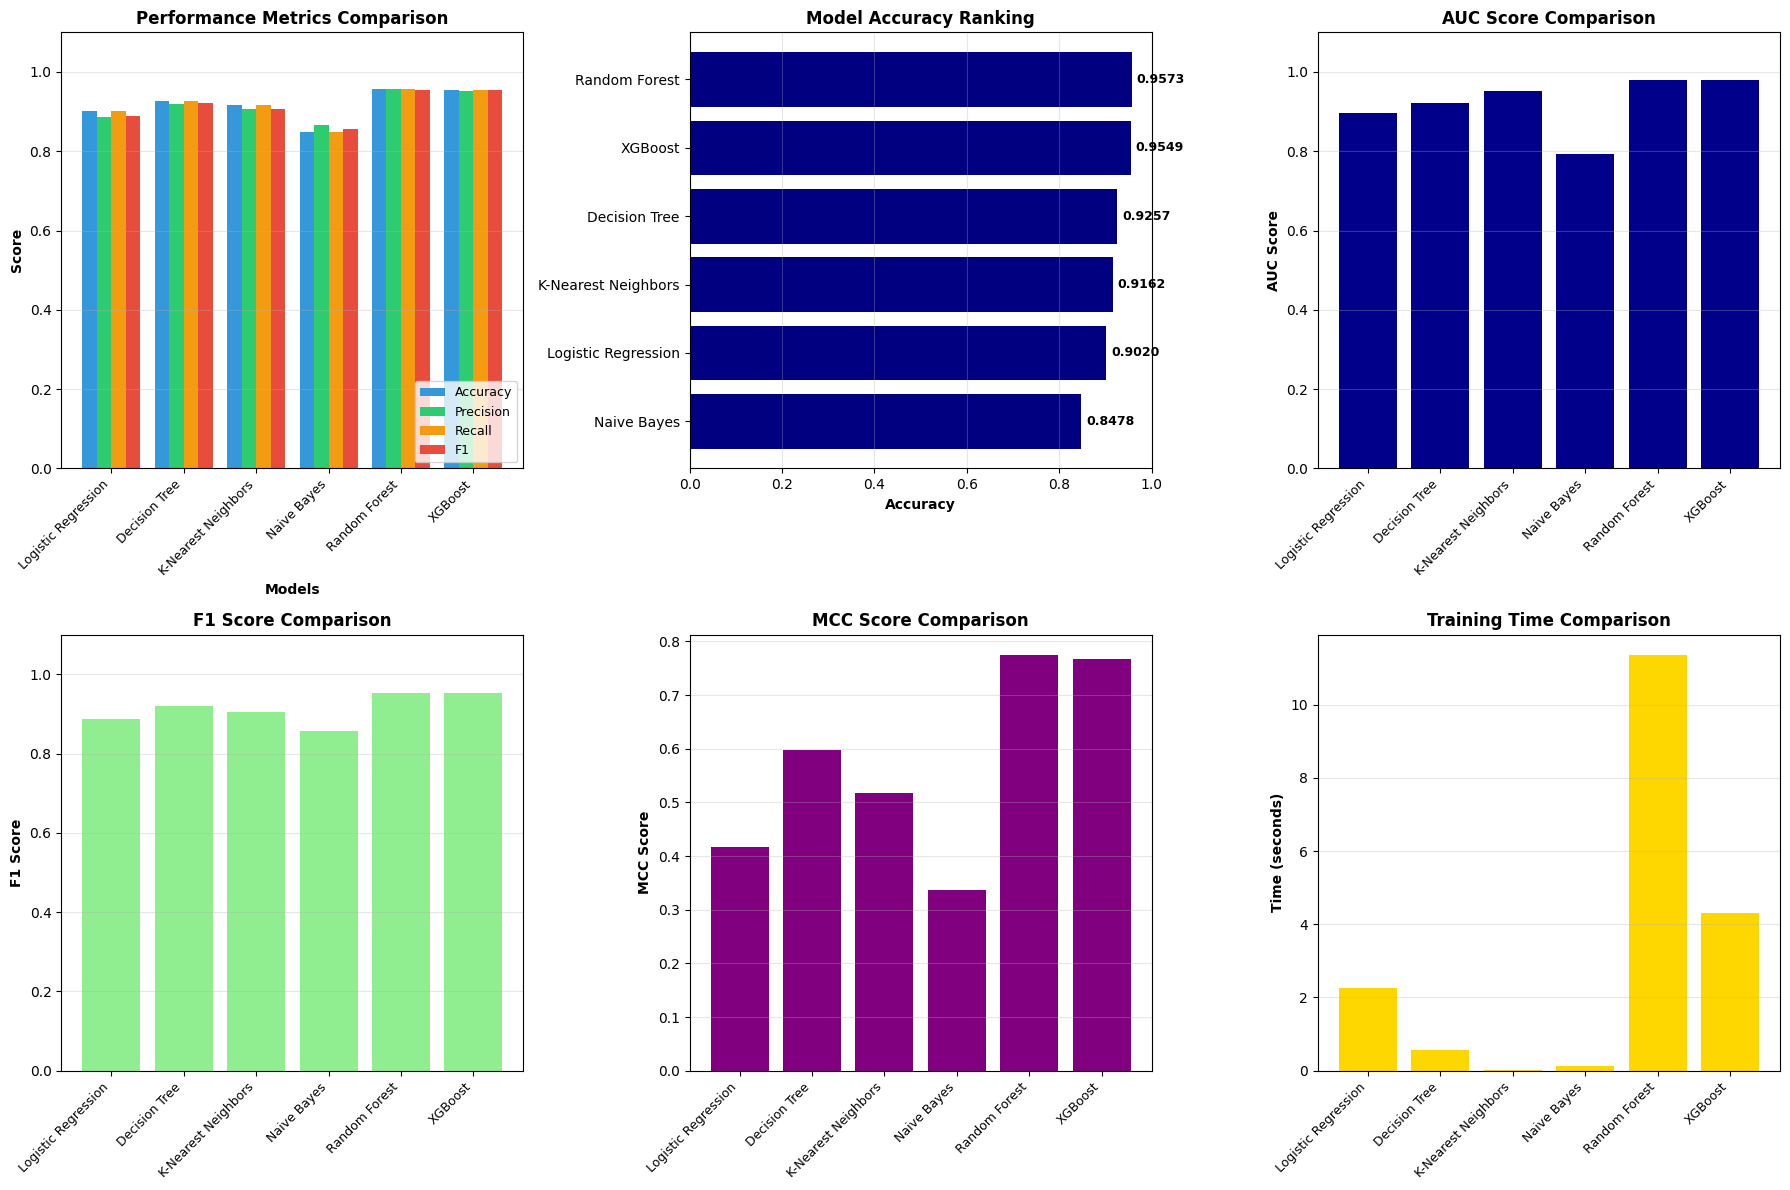

✓ Visualization saved as: model_comparison_visualization.png


In [34]:
#VISUALIZATIONS
# =============================================================================
print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)
# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))
# Plot 1: Performance Metrics Comparison
ax1 = plt.subplot(2, 3, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(comparison_df))
width = 0.2
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, comparison_df[metric], width, label=metric, color=colors[i])
ax1.set_xlabel('Models', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Performance Metrics Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(comparison_df['ML Model Name'], rotation=45, ha='right', fontsize=9)
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1.1])
# Plot 2: Accuracy Ranking
ax2 = plt.subplot(2, 3, 2)
sorted_df = comparison_df.sort_values('Accuracy', ascending=True)
bars = ax2.barh(sorted_df['ML Model Name'], sorted_df['Accuracy'], color='#000080', label='Navy Blue')
ax2.set_xlabel('Accuracy', fontweight='bold')
ax2.set_title('Model Accuracy Ranking', fontsize=12, fontweight='bold')
ax2.set_xlim([0, 1.0])
ax2.grid(axis='x', alpha=0.3)
for bar in bars:
    width_val = bar.get_width()
    ax2.text(width_val + 0.01, bar.get_y() + bar.get_height()/2,
        f'{width_val:.4f}', ha='left', va='center', fontsize=9, fontweight='bold')
# Plot 3: AUC Comparison
ax3 = plt.subplot(2, 3, 3)
ax3.bar(comparison_df['ML Model Name'], comparison_df['AUC'], color='darkblue')
ax3.set_ylabel('AUC Score', fontweight='bold')
ax3.set_title('AUC Score Comparison', fontsize=12, fontweight='bold')
ax3.set_xticklabels(comparison_df['ML Model Name'], rotation=45, ha='right', fontsize=9)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([0, 1.1])
# Plot 4: F1 Score Comparison
ax4 = plt.subplot(2, 3, 4)
ax4.bar(comparison_df['ML Model Name'], comparison_df['F1'], color='lightgreen')
ax4.set_ylabel('F1 Score', fontweight='bold')
ax4.set_title('F1 Score Comparison', fontsize=12, fontweight='bold')
ax4.set_xticklabels(comparison_df['ML Model Name'], rotation=45, ha='right', fontsize=9)
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0, 1.1])
# Plot 5: MCC Comparison
ax5 = plt.subplot(2, 3, 5)
ax5.bar(comparison_df['ML Model Name'], comparison_df['MCC'], color='purple')
ax5.set_ylabel('MCC Score', fontweight='bold')
ax5.set_title('MCC Score Comparison', fontsize=12, fontweight='bold')
ax5.set_xticklabels(comparison_df['ML Model Name'], rotation=45, ha='right', fontsize=9)
ax5.grid(axis='y', alpha=0.3)
# Plot 6: Training Time
ax6 = plt.subplot(2, 3, 6)
ax6.bar(time_df['Model'], time_df['Time (seconds)'], color='gold')
ax6.set_ylabel('Time (seconds)', fontweight='bold')
ax6.set_title('Training Time Comparison', fontsize=12, fontweight='bold')
ax6.set_xticklabels(time_df['Model'], rotation=45, ha='right', fontsize=9)
ax6.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved as: model_comparison_visualization.png")

## Individual Confusion Matrices


Creating individual confusion matrix plots...


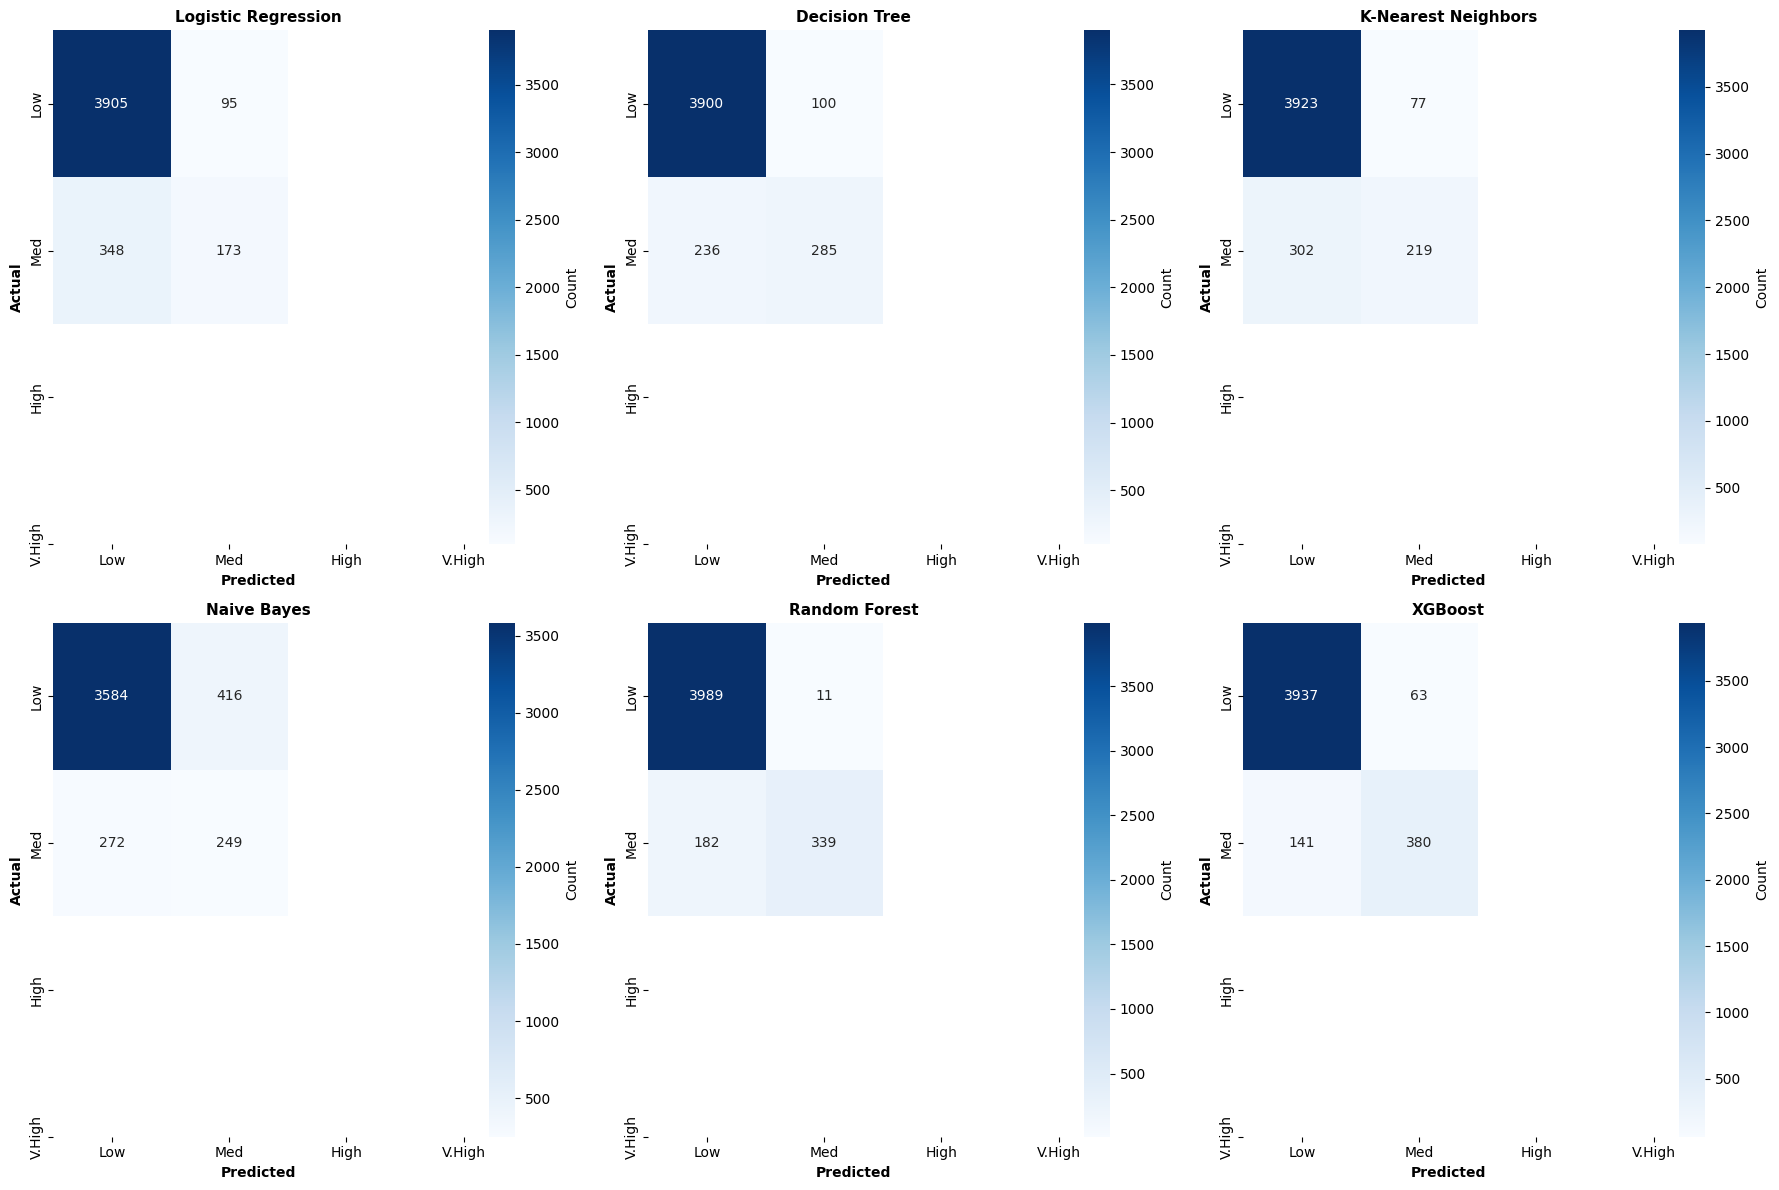

✓ Confusion matrices saved as: all_confusion_matrices.png


In [30]:
# INDIVIDUAL CONFUSION MATRICES
# =============================================================================
print("\nCreating individual confusion matrix plots...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
for idx, result in enumerate(all_results):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
        xticklabels=['Low', 'Med', 'High', 'V.High'],
        yticklabels=['Low', 'Med', 'High', 'V.High'],
        ax=axes[idx], cbar_kws={'label': 'Count'})
    axes[idx].set_xlabel('Predicted', fontweight='bold')
    axes[idx].set_ylabel('Actual', fontweight='bold')
    axes[idx].set_title(f'{result["model_name"]}', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.savefig('all_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Confusion matrices saved as: all_confusion_matrices.png")

## Final Summary

In [32]:
# FINAL SUMMARY
# =============================================================================
print("\n" + "="*80)
print("✓ ALL MODELS TRAINED AND EVALUATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated Files:")
files = [
    'logistic_regression.pkl',
    'decision_tree.pkl',
    'knn.pkl',
    'naive_bayes.pkl',
    'random_forest.pkl',
    'xgboost.pkl',
    'scaler.pkl',
    'model_comparison.csv',
    'model_comparison_visualization.png',
    'all_confusion_matrices.png'
]
for file in files:
    print(f" ✓ {file}")
print("\n" + "="*80)
print(f"Completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)
print("\n📊 NEXT STEPS:")
print("1. Review model_comparison.csv for detailed metrics")
print("2. Check visualizations (PNG files)")
print("3. Run: streamlit run app.py")
print("4. Upload test data and get predictions")
print("\n" + "="*80)


✓ ALL MODELS TRAINED AND EVALUATED SUCCESSFULLY!

Generated Files:
 ✓ logistic_regression.pkl
 ✓ decision_tree.pkl
 ✓ knn.pkl
 ✓ naive_bayes.pkl
 ✓ random_forest.pkl
 ✓ xgboost.pkl
 ✓ scaler.pkl
 ✓ model_comparison.csv
 ✓ model_comparison_visualization.png
 ✓ all_confusion_matrices.png

Completed at: 2026-01-24 20:25:07

📊 NEXT STEPS:
1. Review model_comparison.csv for detailed metrics
2. Check visualizations (PNG files)
3. Run: streamlit run app.py
4. Upload test data and get predictions

